<a href="https://colab.research.google.com/github/d-widyantama/FakerLibraryTrial/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context

### **Bank Marketing Campaigns Data**
It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'


The data obtained from research of bank loan targeting through telemarketing phone calls to sell longterm deposits. Within a campaign, the human agents execute phone calls to
a list of clients to sell the deposit (outbound) or, if meanwhile the client calls
the contact-center for any other reason, he is asked to subscribe the deposit
(inbound). Thus, the result is a binary unsuccessful or successful contact.



### *Business Problem*
How to predict clients who are willing to subscribe for long term deposit so we can maximize sales with good efficiency.


#### Customer acquisition Cost

The average new account cost a bank or credit union between \$350-\$422 per account (Source: https://solutions.datatrac.net/roicalculator)



### Goals


### Analytical Approach
Analyzing data to find patterns to differentiate potential subscriber. Then we will build a classification model to predict the probability for each customer that wants to sub or not.

![picture](https://drive.google.com/uc?id=1Ytj6F21nQzkxfpFajRtg8DcQBiprMDen)

### Metric Evaluation
<br>Positive (1) : 'Yes', Customer who deposits
<br>Negative (0) : 'No', Customer who does not deposit
<br>False Positive : Predicted as 'Yes' but in reality did not deposit
<br>Consequences : Wasting marketing budget
<br>False Negative : Predicted as 'No' but in reality did deposit
<br>Consequences : Losing a potential subscriber

As the False Positive metric is more damaging to the company, therefore, to minimize this metric, Precision will be the analytical approach of choice.


## Data Understanding

**Bank client data:**

| Feature             | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
|age|Numerical Value of someone's Age|
|job|type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")|
|marital|marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)|
|education|(categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")|
|default| has credit in default? (categorical: "no","yes","unknown")
|housing|has housing loan? (categorical: "no","yes","unknown")
|loan|has personal loan? (categorical: "no","yes","unknown")

**Related with the last contact of the current campaign:**

| Feature             | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
| contact| contact communication type (categorical: "cellular","telephone")
|month|last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
|day_of_week|last contact day of the week (categorical: "mon","tue","wed","thu","fri")
|duration|last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

| Feature             | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
|campaign|number of contacts performed during this campaign and for this client (numeric, includes last contact)
|pdays|number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
|previous|number of contacts performed before this campaign and for this client (numeric)
|poutcome|outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**social and economic context attributes**

| Feature             | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
|emp.var.rate| employment variation rate - quarterly indicator (numeric)
|cons.price.idx| consumer price index - monthly indicator (numeric)
|cons.conf.idx|consumer confidence index - monthly indicator (numeric)
|euribor3m| euribor 3 month rate - daily indicator (numeric)
|nr.employed|number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

- y - has the client subscribed a term deposit? (binary: "yes","no")



Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

Pertanyaan :
- Educationk, di ordinal tidak --> iya
- Job, di ordinal tidak --> tidak
- campaign dan previous, digabung?


Hapus :
- contact

Prediction tidak dipakai :
- month
- week
- duration
- pdays

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/bank-additional-full.csv', sep = ';')

In [7]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
list = []

for i in df.columns :
  list.append([i,len(df[df[i]=='unknown']),round((len(df[df[i]=='unknown'])/len(df)*100),2), df[i].isna().sum(), df[i].nunique(), df[i].unique()])

pd.DataFrame(list, columns = ['Column Name', 'Number of "Unknown"','"Unknown" %', 'Number of null', 'Number of Unique', 'Unique values'])

,Column Name,"Number of ""Unknown""","""Unknown"" %",Number of null,Number of Unique,Unique values
0,age,0,0.00,0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 5..."
1,job,330,0.80,0,12,"[housemaid, services, admin., blue-collar, tec..."
2,marital,80,0.19,0,4,"[married, single, divorced, unknown]"
3,education,1731,4.20,0,8,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
4,default,8597,20.87,0,3,"[no, unknown, yes]"
5,housing,990,2.40,0,3,"[no, yes, unknown]"
6,loan,990,2.40,0,3,"[no, yes, unknown]"
7,contact,0,0.00,0,2,"[telephone, cellular]"
8,month,0,0.00,0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
9,day_of_week,0,0.00,0,5,"[mon, tue, wed, thu, fri]"


In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
df[(df['housing']=='unknown') &(df['loan']=='unknown')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,unknown,unknown,cellular,oct,tue,...,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,unknown,unknown,cellular,oct,thu,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,unknown,unknown,cellular,oct,thu,...,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,unknown,unknown,cellular,oct,mon,...,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


In [17]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

1 = illiterate
<br>2 = High school
<br>3 = Professional course
<br>4 = basic 4y, basic 6 y, basic 9 y, university degree

In [18]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [19]:
##Extract numerical and categorical data

#Numerical Columns
df_num = df.select_dtypes(include = np.number)
display(df_num)

#Categorigal Columns
df_cat = df.select_dtypes(include = object)
df_cat

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


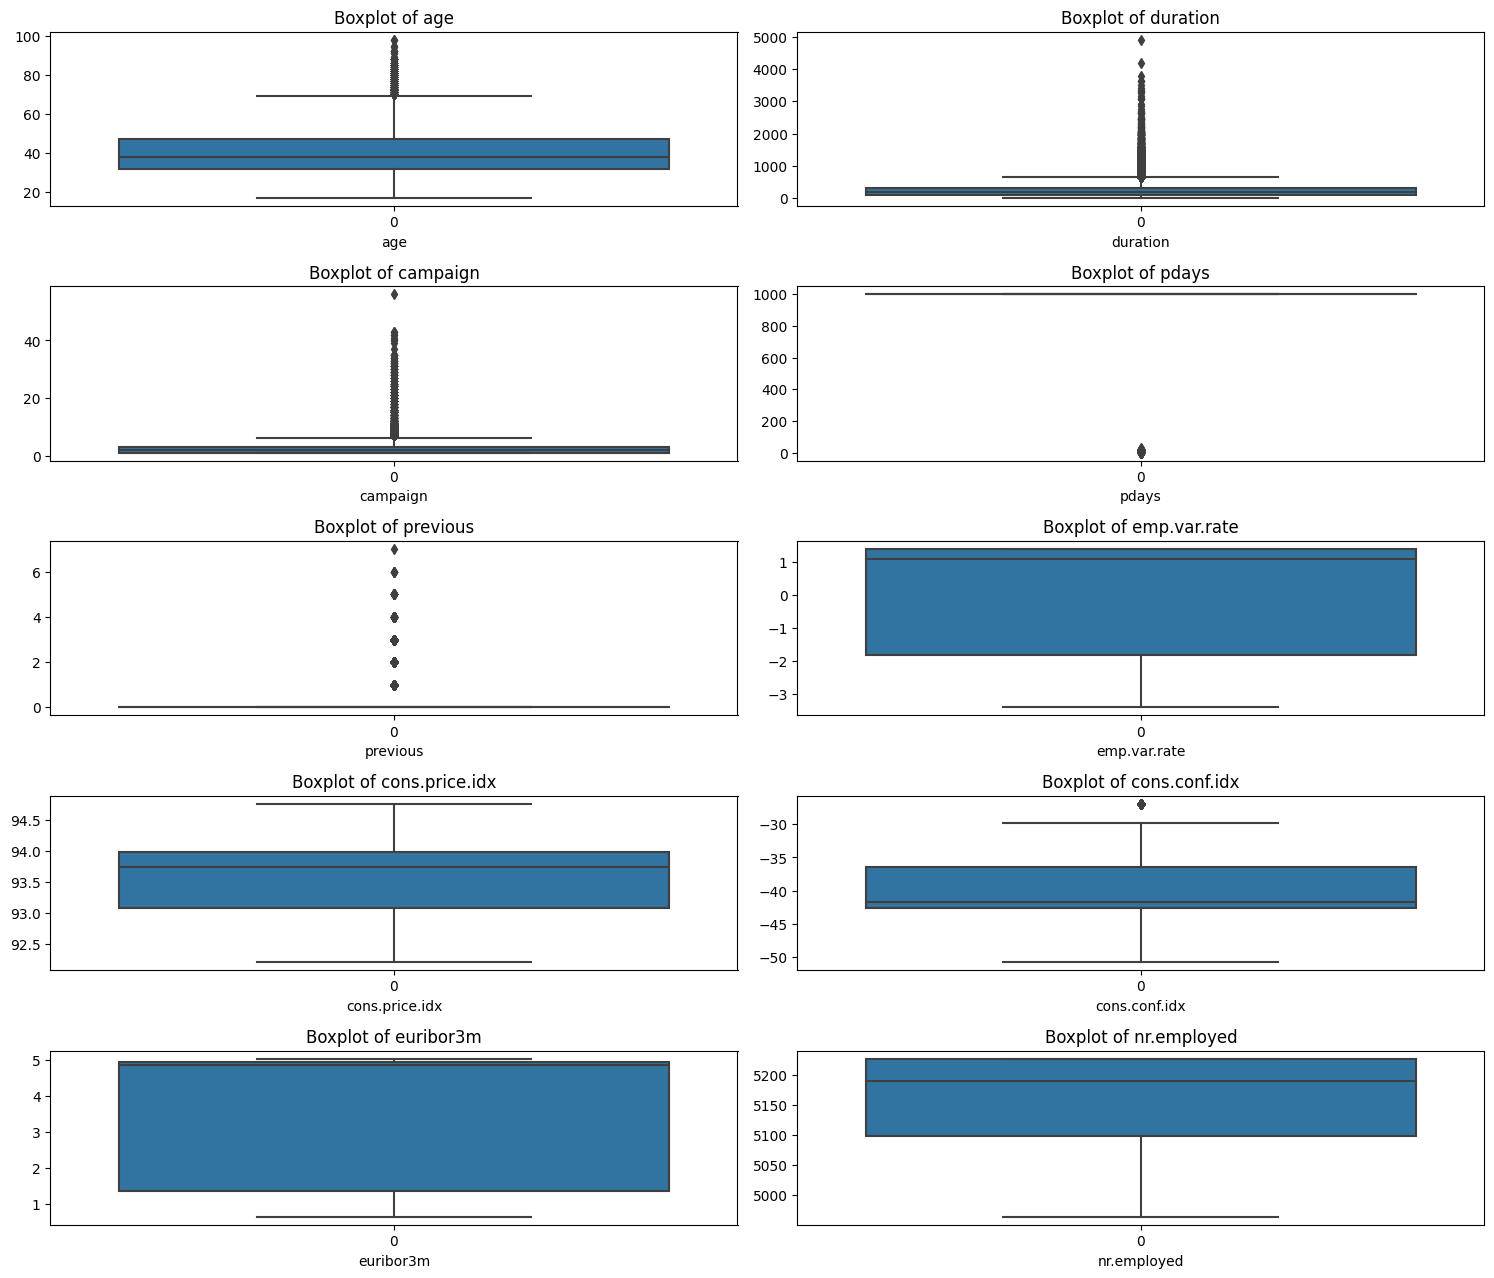

In [20]:
#Plot Numerical Columns


#Initiate subplots
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
# axes = axes.flatten()


for i, column in enumerate(df_num, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(data=df[column], orient='vertical')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)


plt.tight_layout()
plt.show()